**Logistic Regression Modeling**

In this notebook we will model our data using Logistic Regression

First: import all necessary libraries and load in the csv dataset

In [1]:
# BASIC & PANDAS
import numpy as np
import pandas as pd

# SKLEARN & MODELING
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score

In [2]:
df = pd.read_csv("Telecom_churn.csv")

In [80]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,target
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0


In [3]:
# df['p_number'] = df['area code'].astype(str) + df['phone number']
# df['p_number'] = df['p_number'].str.replace('-','')
# df['p_number'] = df['p_number'].astype(int)

In [4]:
df['international plan']= df['international plan'].str.replace('no',"0")
df['international plan']= df['international plan'].str.replace('yes',"1")
df['voice mail plan']= df['voice mail plan'].str.replace('no',"0")
df['voice mail plan']= df['voice mail plan'].str.replace('yes',"1")

In [5]:
df['international plan'] = df['international plan'].astype(int)
df['voice mail plan'] = df['voice mail plan'].astype(int)

In [6]:
df['target'] = df['churn'].astype(int)

In [8]:
cat_col = ['state','area code']
num_col = ['account length','international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']
used_col = cat_col + num_col

Now the data has been prepped we will start with the modeling

In [9]:
X = df[used_col]
y = df['target']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=8)

In [72]:
imputer = SimpleImputer(strategy='median')
scaler = RobustScaler()
encoder = ce.TargetEncoder(cols = cat_col, handle_missing = 'value')

In [73]:
num_transform = make_pipeline(imputer,scaler)
cat_transform = make_pipeline(encoder)

ColTransform = ColumnTransformer(transformers = [('num',num_transform, num_col),
                                                ('cat',cat_transform, cat_col)])

In [74]:
model = LogisticRegression()
pipe = make_pipeline(ColTransform,model)

In [75]:
pipe.fit(X_train, y_train)
train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

In [76]:
train_proba = pipe.predict_proba(X_train)[:,1]
test_proba = pipe.predict_proba(X_test)[:,1]

In [77]:
confusion_matrix(y_test,test_preds)

array([[695,  14],
       [106,  19]])

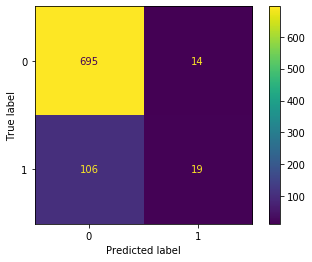

In [78]:
plot_confusion_matrix(pipe, X_test, y_test,
                     values_format=".3g")
plt.grid(False)
plt.show()

In [79]:
print(f'TRAIN Accuracy: {accuracy_score(y_train, train_preds)}')
print(f'TEST Accuracy: {accuracy_score(y_test, test_preds)}')

print(f'TRAIN ROC_AUC: {roc_auc_score(y_train, train_proba)}')
print(f'Test ROC_AUC: {roc_auc_score(y_test, test_proba)}')

TRAIN Accuracy: 0.8687474989995998
TEST Accuracy: 0.8561151079136691
TRAIN ROC_AUC: 0.831842531683884
Test ROC_AUC: 0.8332637517630465


**W/O Balance

* TRAIN Accuracy: 0.8687474989995998
* TEST Accuracy: 0.8561151079136691
* TRAIN ROC_AUC: 0.831842531683884
* Test ROC_AUC: 0.8332637517630465

**W/ Balance

* TRAIN Accuracy: 0.7839135654261705
* TEST Accuracy: 0.7685851318944844
* TRAIN ROC_AUC: 0.8364988949454517
* Test ROC_AUC: 0.8295627644569816

**Conclusion:**
With a little more tweaking of the data there might be methods to find better results but with the size of the dataset we have and this problem generally not being one that is linearly friendly Log Reg model is not the way to go for this project.